# Machine Learning - Assignment 2

#### Cindy Jeon(section 2, group 7) 

## 1. Data Exploration and Visualization(15 pts):
##### Explore the Breast Cancer Dataset.
##### Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
##### Include any other plots you find interesting and provide brief interpretations.

In [3]:
# necessary imports

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import kstest
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the datasets
df = pd.read_csv("/Users/daeunjeon/Library/CloudStorage/GoogleDrive-jeond000@gmail.com/My Drive/MSBA UC DAVIS/Winter 2023/ BAX 452_Machine_Learning/HW/HW2/cancer.csv")

In [5]:
# Display first six observations
print(df.head(6))

# Check the structure of the data
print(df.info())

# Display the summary of the data
print(df.describe(include='all'))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980         

In [6]:
#Mapping diagnosis labels 
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) # encoding my values as malignant for 1 and benign for 0
print(df['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


# #cleaning the data

In [7]:
# data cleaning1: remove any Unnamed columns 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# data cleaning2: Cleaning the missing values
df = df.dropna(how='any')

# data cleaning3: Handling duplicated values and outliers
df = df.drop_duplicates() # clean all duplicated values

In [8]:
# data cleaning4: dealing with missing data
# Store the column names before the imputation
column_names = df.columns

# Apply the imputer
imputer = SimpleImputer(strategy="mean")
df = imputer.fit_transform(df)  # After this, df is a numpy array

# Recreate the DataFrame using the stored column names
df = pd.DataFrame(df, columns=column_names)

# data cleaning5: Remove unnecessary columns
df = df.drop(['id'], axis=1)

# Display the summary of the data
print(df.describe(include='all'))

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

# #Exploring data

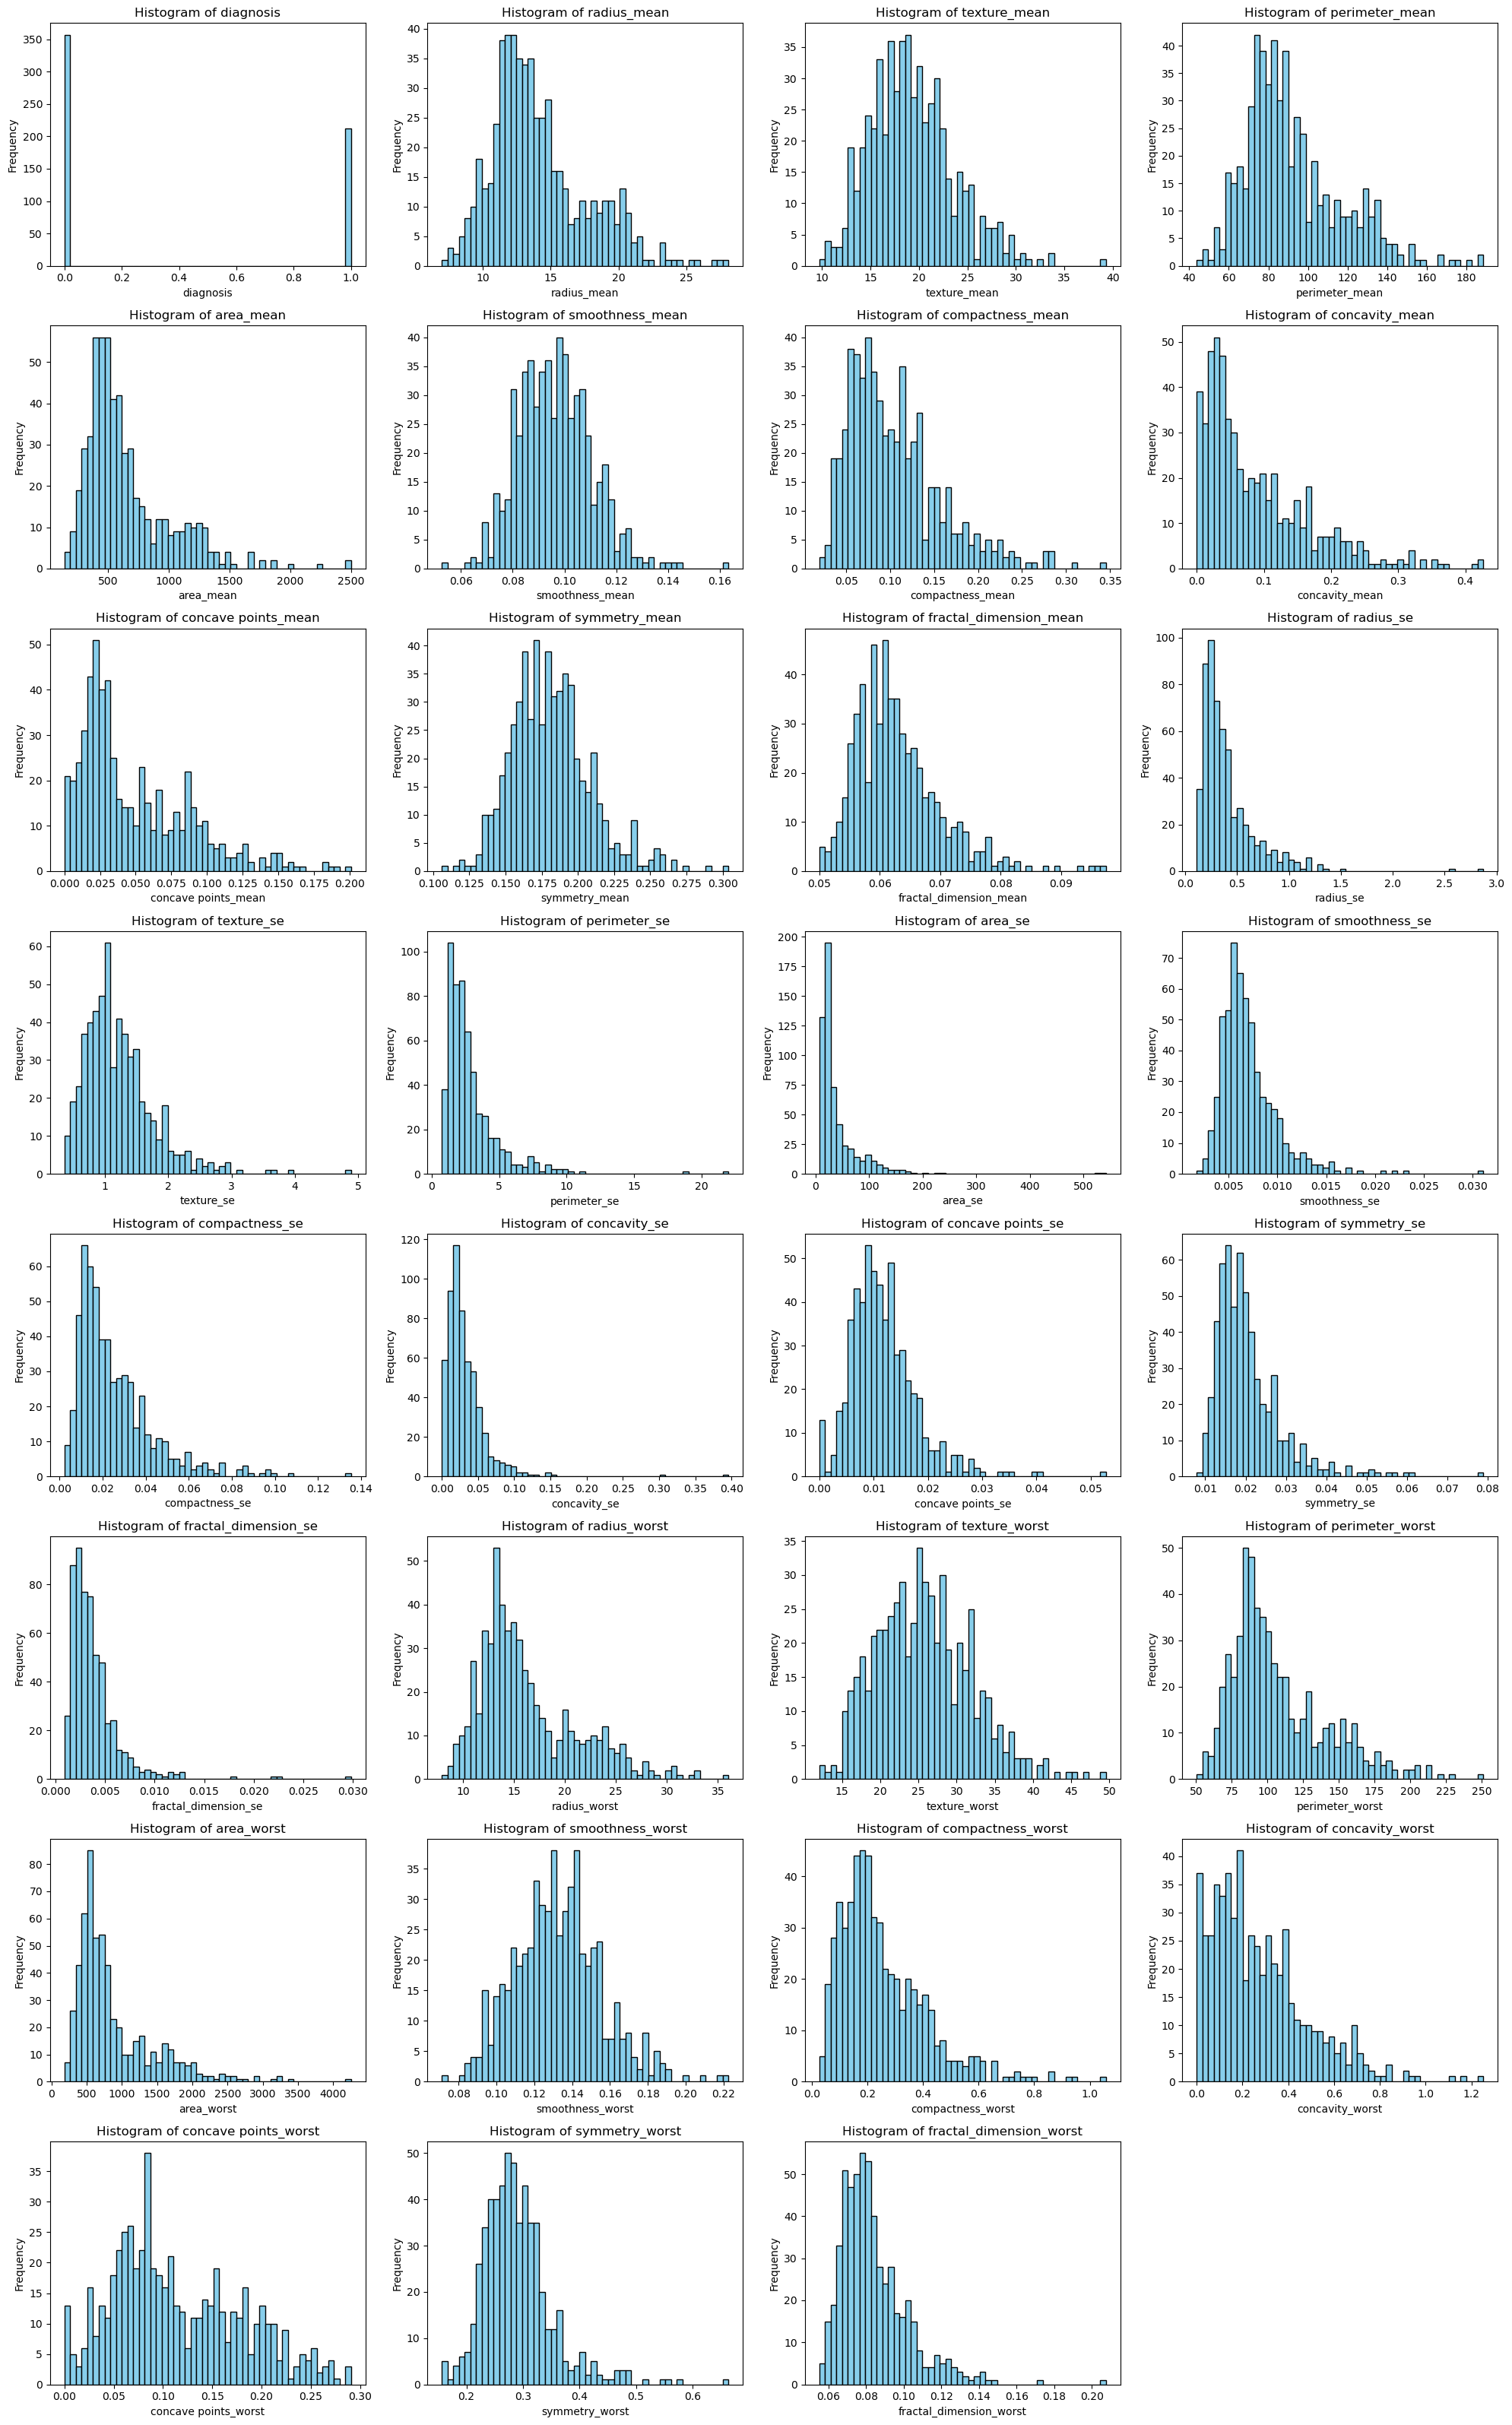

In [9]:
# Filtering out non-numeric columns and columns with all null values
numeric_df = df.select_dtypes(include=[np.number])

# Number of numeric variables
num_vars = len(numeric_df.columns)

# Calculate the number of rows and columns for the subplots
n_cols = 4  
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric variables and plot histograms
for ax, var in zip(axes, numeric_df.columns):
    ax.hist(numeric_df[var], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(numeric_df.columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()


- Insight from Histogram

##### Out of 31 histograms, 24 of them have overall right skewed distribution which means most of the data fall into left bins. 
##### However, smoothness/concave_points/texture_worst, smoothness/symmetry/textture/perimeter_mean are normally distributed. 

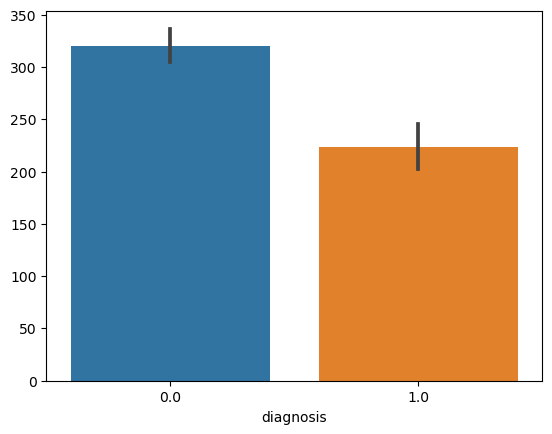

In [10]:
## drow barplot for diagnosis to see the distribution

sns.barplot(x = "diagnosis", y = df.diagnosis.index, data= df);

- Insight from Barplot

##### about 320 people are benign and about 220 people are malignant

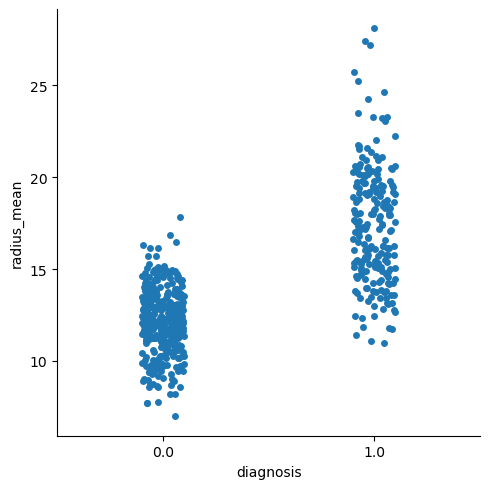

In [11]:
## draw catplot of radius_mean to see how it is related to diagnosis
sns.catplot(x = "diagnosis", y = "radius_mean", data = df);

- Insight from Barplot
##### as radius mean is smaller it is more diagnosed as benign and as the mean increases there are pattern that it is more diagnosed as malignant,
##### in addition, malignant has more scattered distribution 

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

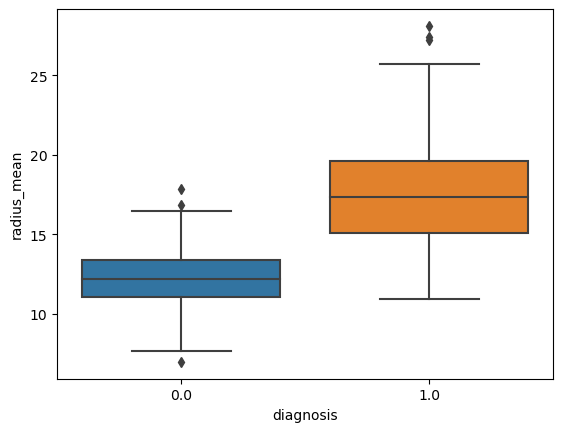

In [12]:
## draw boxplot of radius_mean to see how it is related to diagnosis
sns.boxplot(x="diagnosis", y="radius_mean", data=df)

- Insight from Boxplot
##### boxplot results align with catplot. boxplot with benign has small median with smaller box, while, malignant has longer boxsize and median and range which means it is more scattered
##### A larger box for malignant cases indicates a greater IQR, suggesting more variability within the central 50% of the malignant data compared to the benign. This could mean that malignant cases are more diverse in their presentation or severity.

## 2. **Logistic Regression Model Development** (20 pts): ***must be cross validatiion 
##### Develop a logistic regression model to predict whether cancer is malignant or benign.
##### Preprocess the data as necessary (handling missing values, encoding categorical variables, etc.).
##### Explain the steps you took in preparing the data and developing the model.
##### You might need to encode the values for your prediction.

### 1) Checking data validity

In [13]:
##checking correlaton

corr = df.corr()
corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


<Axes: >

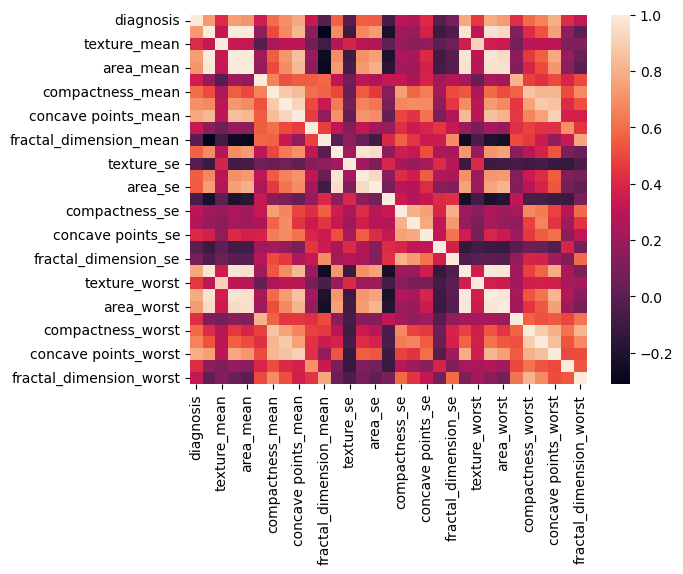

In [14]:
sns.heatmap(corr)

- there are some columns with extremely high corelation and I will get rid of the ones with more than 0.9 to prevent multicolinearity.

### 2) getting rid of variables that have high correlation

In [15]:
# Select correlations greater than 0.9 (absolute value for both positive and negative correlations)
high_corr = np.where(np.abs(corr) > 0.9)

# Create a set of column names to drop (excluding the diagonal elements from the correlation matrix)
to_drop = set([corr.columns[x] for x, y in zip(*high_corr) if x != y and x < y])

# Drop the columns from the DataFrame
df_reduced = df.drop(columns=to_drop)


# df_reduced now contains the DataFrame with highly correlated variables removed
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   smoothness_mean          569 non-null    float64
 2   compactness_mean         569 non-null    float64
 3   symmetry_mean            569 non-null    float64
 4   fractal_dimension_mean   569 non-null    float64
 5   texture_se               569 non-null    float64
 6   area_se                  569 non-null    float64
 7   smoothness_se            569 non-null    float64
 8   compactness_se           569 non-null    float64
 9   concavity_se             569 non-null    float64
 10  concave points_se        569 non-null    float64
 11  symmetry_se              569 non-null    float64
 12  fractal_dimension_se     569 non-null    float64
 13  texture_worst            569 non-null    float64
 14  area_worst               5

- got rid of colums with correlation over 0.9 to prevent multicolleaniarity


### 3) split the data for training and test

In [16]:
#prepare data
df = df_reduced

# Prepare X and Y
X = df.drop(['diagnosis'], axis=1)             
X = sm.add_constant(X)  # Add a constant (intercept) to the predictors
y = df['diagnosis']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

### 4) Run GLM

In [17]:
glm_model = sm.GLM(y_train, X_train).fit()
glm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      434
Model Family:                Gaussian   Df Model:                           20
Link Function:               Identity   Scale:                        0.067560
Method:                          IRLS   Log-Likelihood:                -21.815
Date:                Thu, 25 Jan 2024   Deviance:                       29.321
Time:                        21:52:43   Pearson chi2:                     29.3
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9175
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2575      0.253     -1.016      0.310      -0.754       0.239
smoothness_mean             3.3151      2.290      1.448      0.148      -1.172       7.803
compactness_mean            0.3651      1.022      0.357      0.721      -1.638       2.368
symmetry_mean               0.1460      0.903      0.162      0.872      -1.624       1.916
fractal_dimension_mean    -18.8989      5.560     -3.399      0.001     -29.797      -8.001
texture_se                  0.0111      0.038      0.294      0.769      -0.063       0.085
area_se                    -0.0001      0.001     -0.253      0.800      -0.001       0.001
smoothness_se              18.1153      7.408      2.445      0.014       3.595      32.636
compactness_se             -2.7628      2.557     -1.081      0.280      -7.774       2.248
concavity_se               -3.5998      1.290     -2.790      0.005      -6.129      -1.071
concave points_se           8.9979      5.406      1.664      0.096      -1.598      19.594
symmetry_se                 4.7722      3.077      1.551      0.121      -1.259      10.804
fractal_dimension_se       11.5652     13.258      0.872      0.383     -14.420      37.551
texture_worst               0.0110      0.003      3.360      0.001       0.005       0.017
area_worst                  0.0002   6.54e-05      3.174      0.002    7.93e-05       0.000
smoothness_worst           -1.6751      1.673     -1.001      0.317      -4.954       1.604
compactness_worst          -0.5740      0.423     -1.356      0.175      -1.404       0.256
concavity_worst             0.7736      0.272      2.849      0.004       0.241       1.306
concave points_worst        2.7645      0.858      3.223      0.001       1.083       4.446
symmetry_worst              0.3181      0.565      0.563      0.574      -0.790       1.426
fractal_dimension_worst     6.1027      2.821      2.164      0.030       0.574      11.631
===========================================================================================
"""

## 3. **Model Evaluation** (20 pts):
##### Evaluate your logistic regression model using appropriate metrics (e.g., accuracy, R^2, RMSE (all out-of-sample)).
##### Split the dataset into training and testing sets to perform this evaluation.
##### Interpret these metrics to assess the performance of your model. Is it good? Why?

# 1) Accuracy

In [19]:
# glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

# Predict probabilities
predicted_probabilities = glm_model.predict(X_train)  # Use X_test if you're evaluating on test data

# Convert probabilities to 0 or 1 using 0.5 as the threshold
predicted_classes = np.where(predicted_probabilities > 0.5, 1, 0)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y_train)  # Use y_test if you're evaluating on test data
print(f'Accuracy: {accuracy}')


Accuracy: 0.9582417582417583


- The model has a high accuracy of 97.1%, effectively classifying cells as Malignant or Benign.

# 2) R square

In [20]:
# Calculate the R^2 value
r_squared = 1 - (glm_model.deviance / glm_model.null_deviance)

r_squared

0.7233052118914728

- The R-squared value is `0.723`, indicating that approximately 72.3% of the variance in the diagnosis can be explained by the model

# 3) RMSE(Root Mean Square Error) calculation

In [21]:
# Predict on the same data you used to fit the model (or use test data if you have it)
predicted_values = glm_model.predict(X_train)  # Replace X_train with X_test if you're evaluating test data

# Calculate residuals
residuals = y_train - predicted_values  # Replace y_train with y_test if you're evaluating test data

# Compute RMSE
rmse = np.sqrt(np.mean(residuals**2))
print(f'RMSE: {rmse}')


RMSE: 0.2538543921734452


- RMSE is 0.25 which is relatively very low

# #Conclusion

- based on R^2, RMSE, and accuracy, I can say that this model is very accurate and well functioning.

## 4. **Testing Interactions Between Features** (30 pts):
##### Explore and test the interactions between different features in the dataset. Pay particular attention to interactions involving both categorical/dummy and continuous variables.
##### For this excercise, use a linear regression rather than a logistic regression model.
##### Discuss issues that occur when using a linear regression model to predict binary outcomes.
##### Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
##### Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
##### Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.


In [22]:
# Splitting dataset into training and testing set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1000)

In [23]:
# Run the regression model
interaction_reg = smf.ols(formula='diagnosis ~ symmetry_mean + smoothness_mean + diagnosis:symmetry_mean + diagnosis:smoothness_mean', data=train_df).fit()

# Display the summary of the regression model with interaction terms
interaction_reg_summary = interaction_reg.summary()

interaction_reg_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7908.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:52:44   Log-Likelihood:                 656.58
No. Observations:                 455   AIC:                            -1303.
Df Residuals:                     450   BIC:                            -1283.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.3501      0.022     15.570      0.000       0.306       0.394
symmetry_mean                -1.0749      0.151     -7.127      0.000      -1.371      -0.778
smoothness_mean              -1.7100      0.274     -6.235      0.000      -2.249      -1.171
diagnosis:symmetry_mean       2.0448      0.235      8.689      0.000       1.582       2.507
diagnosis:smoothness_mean     6.0952      0.437     13.961      0.000       5.237       6.953
==============================================================================
Omnibus:                       17.892   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.721
Skew:                          -0.150   Prob(JB):                     3.91e-09
Kurtosis:                       4.397   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Insights

-  1) issues using a linear regression model to predict binary outcomes : Coefficients in linear regression represent the change in the dependent variable for a one-unit change in an independent variable. For binary outcomes, interpreting these changes as changes in probabilities can be misleading, especially when the predicted values are outside the 0-1 range. so for For binary outcomes, logistic regression or other binary classification methods are more appropriate.

- 2) data interpretation : The R-squared value is 0.986, indicating approximately 98.6% of the variance in the diagnosis can be explained by the radius_mean and smoothness_mean and interaction of them with diagnosis in the model. However, the R-squared value is near 100% and it could be reason of overffing. 
   - diagnosis:symmetry_mean (2.0448): This interaction term suggests that the effect of symmetry_mean on the dependent variable changes by an additional 2.0448 units for each one-unit increase in symmetry_mean when diagnosis is 1 (compared to when diagnosis is 0). This means that if diagnosis switches from 0 to 1, the effect of symmetry_mean on the dependent variable shifts from being negative (-1.0749) to being slightly positive (2.0448 -1.0749 = 0.9699).
   - diagnosis:smoothness_mean (6.0952): Similarly, this coefficient indicates that the effect of smoothness_mean on the dependent variable changes by an additional 6.0952 units for each one-unit increase in smoothness_mean when diagnosis is 1. This represents a significant positive interaction, changing the overall effect of smoothness_mean from negative to positive when diagnosis is 1 (6.0952 -1.7100 = 4.3852).

## 5. **Feature Selection and Cross-Validation: Full vs. Reduced Model** (15 pts):
##### Create a reduced model using only a subset of significant predictors. You can use methods like FDR Cutoff, forward selection, backward elimination, or any other appropriate feature selection technique.
##### Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.
##### Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why.

In [24]:
# Prepare X and Y
X = df.drop(['diagnosis'], axis=1)             
y = df['diagnosis']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [25]:
def forward_stepwise_selection(X, y, significance_level=0.05): 
    """
    Perform forward stepwise selection to determine significant variables
    for a logistic regression model.
    # In a clinical condition, we set the bar higher
    """
    initial_features = X.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        pvalues = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.Logit(y, sm.add_constant(X[best_features + [new_column]])).fit(disp=0)
            pvalues[new_column] = model.pvalues[new_column]
        min_p_value = pvalues.min()
        if min_p_value < significance_level:
            best_features.append(pvalues.idxmin())
        else:
            break
    return best_features
# Apply forward stepwise selection
selected_features = forward_stepwise_selection(X_train, y_train)
print("Selected features:", selected_features)

Selected features: ['concavity_worst', 'concave points_worst', 'area_worst', 'area_se', 'texture_worst', 'compactness_se']


- I will only select 6 variables for my reduced model based on forward_stepwise_selection result with 0.05 cut off point and the 6 variables are 'concavity_worst', 'concave points_worst', 'area_worst', 'area_se', 'texture_worst', 'compactness_se'.

In [26]:
# Establish a full model
# Convert columns to a NumPy array for K-Fold CV
X = df.drop(['diagnosis'], axis=1).values
y = df.diagnosis.values

In [27]:
# Define K for K-Fold cross-validation
K = 10
fold_size = len(X) // K
# 10% data -> testing
# 90% -> training

In [28]:
# Initialize list to store accuracy for each fold
accuracies = []

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = list(range(k * fold_size, (k + 1) * fold_size))

    # Split the data into training and testing sets
    # 100% data -> remove 10% of it
    X_train = np.delete(X, test_indices, axis=0)
    y_train = np.delete(y, test_indices, axis=0)
    # 10% of it
    X_test = X[test_indices]
    y_test = y[test_indices]

    # Initialize and train the model
    model = LogisticRegression(max_iter=1000)
    # train on the 90% of the data
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    # predict on the rest 10%
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Print acuracies
accuracies

[0.875,
 0.9285714285714286,
 0.9464285714285714,
 0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143,
 0.9821428571428571,
 0.9285714285714286,
 0.9464285714285714]

In [29]:
# Calculate the average accuracy across all folds
average_accuracy_f = np.mean(accuracies)
print("Average Accuracy of the full model:", average_accuracy_f)

Average Accuracy of the full model: 0.9464285714285714


In [30]:
# Evaluate the out-of-sample performance
# Calculate cross-validated metrics
precision = cross_val_score(model, X, y, cv=10, scoring='precision')
recall = cross_val_score(model, X, y, cv=10, scoring='recall')
f1 = cross_val_score(model, X, y, cv=10, scoring='f1')
roc_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

# Print average metrics
print('Average Precision of the full model:', np.mean(precision))
print('Average Recall of the full model:', np.mean(recall))
print('Average F1 Score of the full model:', np.mean(f1))
print('Average ROC AUC of the full model:', np.mean(roc_auc))

Average Precision of the full model: 0.9530215195432585
Average Recall of the full model: 0.9203463203463205
Average F1 Score of the full model: 0.9345198873729788
Average ROC AUC of the full model: 0.9937813509242079


In [31]:
# Establish a reduced model

# Convert columns to a NumPy array for K-Fold CV
X_r = df[selected_features].values
y_r = df['diagnosis'].values

In [32]:
# Define K for K-Fold cross-validation
K = 10
fold_size = len(X_r) // K
# 10% data -> testing
# 90% -> training

In [33]:
# Initialize list to store accuracy for each fold
accuracies_r = []

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = list(range(k * fold_size, (k + 1) * fold_size))

    # Split the data into training and testing sets
    # 100% data -> remove 10% of it
    X_train = np.delete(X_r, test_indices, axis=0)
    y_train = np.delete(y_r, test_indices, axis=0)
    # 10% of it
    X_test = X_r[test_indices]
    y_test = y_r[test_indices]

    # Initialize and train the model
    model = LogisticRegression(max_iter=1000)
    # train on the 90% of the data
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    # predict on the rest 10%
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies_r.append(accuracy)

# Print acuracies
accuracies_r

[0.8214285714285714,
 0.9642857142857143,
 0.9464285714285714,
 0.9464285714285714,
 0.9642857142857143,
 0.9821428571428571,
 0.9642857142857143,
 0.9821428571428571,
 0.9285714285714286,
 0.9642857142857143]

In [34]:
# Calculate the average accuracy across all folds
average_accuracy_r = np.mean(accuracies_r)
print("Average Accuracy of the reduced model:", average_accuracy_r)

Average Accuracy of the reduced model: 0.9464285714285714


In [35]:
# Evaluate the out-of-sample performance
# Calculate cross-validated metrics
precision = cross_val_score(model, X_r, y_r, cv=10, scoring='precision')
recall = cross_val_score(model, X_r, y_r, cv=10, scoring='recall')
f1 = cross_val_score(model, X_r, y_r, cv=10, scoring='f1')
roc_auc = cross_val_score(model, X_r, y_r, cv=10, scoring='roc_auc')

# Print average metrics
print('Average Precision of the reduced model:', np.mean(precision))
print('Average Recall of the reduced model:', np.mean(recall))
print('Average F1 Score of the reduced model:', np.mean(f1))
print('Average ROC AUC of the reduced model:', np.mean(roc_auc))

Average Precision of the reduced model: 0.9529060794278186
Average Recall of the reduced model: 0.9205627705627706
Average F1 Score of the reduced model: 0.934539604845901
Average ROC AUC of the reduced model: 0.9928846285989141


## * Interpretation

- Average Accuracy : the full model is 0.9464 and reduced model is 0.9464 so they are the same
- Average Precision : the full model is 0.9530 and reduced model is 0.9529, the full model is 0.0001 higher in precision
- Average Recall : the full model is 0.9203 and reduced model is 0.9205, the reduced model is 0.0002 higher in recall
- Average F1 Score : the full model is 0.93451 and reduced model is 0.93453, the reduced model is 0.00002 higher in F1
- Average ROC AUC : the full model is 0.9937 and reduced model is 0.9928, the full model is 0.0009 higher in ROC AUC

- Conclusion : in general, overall performance are very similar and there are very minor gaps between two models.Given the extremely small differences in the performance metrics, the decision might lean towards the reduced model if it offers significant advantages in terms of simplicity, speed, and ease of use, without sacrificing predictive power. However, if there are no such constraints, the choice might simply come down to a preference for the slightly better metric values of the full model.